# Task 2: Customer Segmentation Using KMeans Clustering

Create a KMeans clustering algorithm to group customers of a retail store based on their purchase behavior. The task includes:

- **Model Building:** Train a KMeans clustering model using features such as Age, Annual Income, and Spending Score (1-100) to group customers into clusters..
- **Data Visualization:** 
  - **Cluster Visualization:** Create a scatter plot to visualize customer clusters based on Annual Income and Spending Score (1-100).
  - **Elbow Method Plot:** Plot the elbow curve to determine the optimal number of clusters.
- **Model Evaluation:** Use the elbow method and interpret the clusters for effective customer segmentation.

Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

Load the Dataset

In [2]:
df = pd.read_csv('Mall_Customers.csv') 

 Explore the dataset

In [3]:
print(df.head())
print(df.info())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


Select relevant features for clustering (Age, Annual Income, Spending Score)

In [4]:
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

Standardize the data

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Applying K-means clustering

In [6]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
kmeans.fit(X_scaled)

KMeans(n_clusters=5, random_state=42)

Adding the cluster labels to the original data

In [7]:
df['Cluster'] = kmeans.labels_

Visualizing the clusters

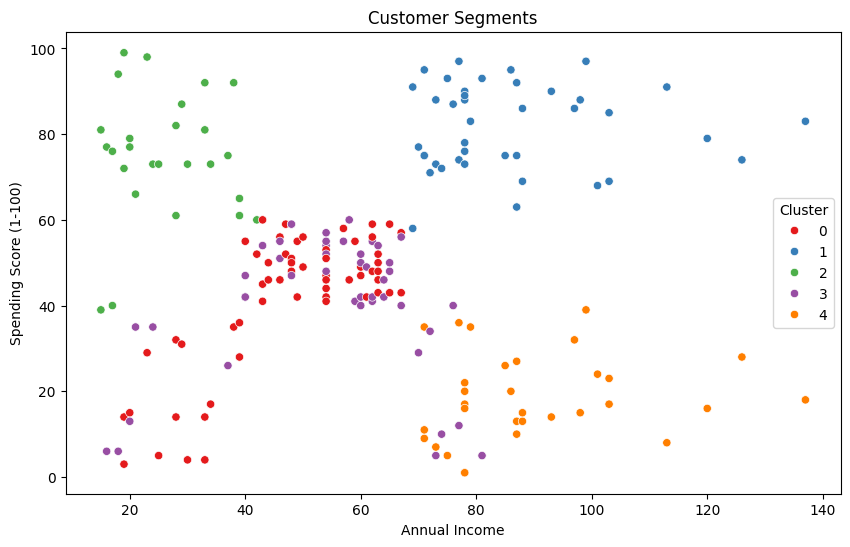

In [8]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='Set1')
plt.title('Customer Segments')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score (1-100)')
plt.show()

Evaluate the model using the elbow method

In [9]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

Plot the elbow curve

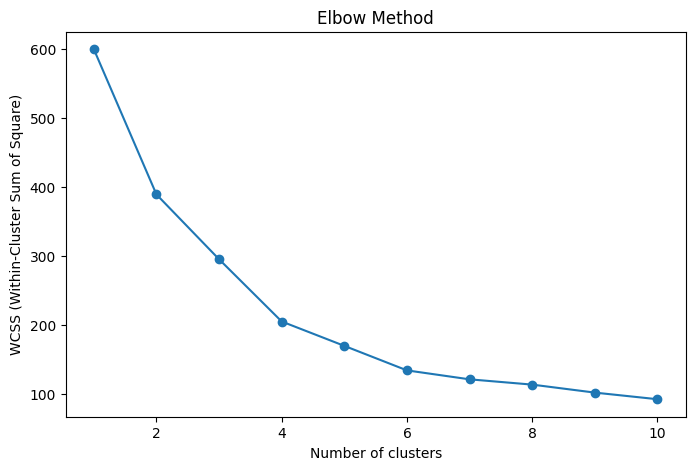

In [10]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Square)')
plt.show()